In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np
import random
from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
# Import Naivebayes
from sklearn.naive_bayes import GaussianNB
#Importación de matriz de confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# PARA REVISAR DISTRIBUCIÓN DE LA NORMALIDAD
from scipy.stats import normaltest

# PARA REVISAR LA CORRELACIÓN DE LOS DATOS
import seaborn as sb

#
from sklearn.preprocessing import LabelEncoder

#Importación de la regresión logistica
from sklearn.linear_model import LogisticRegression

# Para árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
# para validación cruzada
from sklearn.model_selection import cross_val_score
# Maquinas
from sklearn.svm import SVC
#Regresión lineal
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['Myocardial infarction complications.csv']),delimiter=",",header=None)

Saving Myocardial infarction complications.csv to Myocardial infarction complications.csv


In [4]:
dataframe.head(25)

0   1    2   3   4   5   6   7   8   9    ... 114 115 116 117 118 119 120  \
0     1  77    1   2   1   1   2   ?   3   0  ...   0   0   0   0   0   0   0   
1     2  55    1   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     3  52    1   0   0   0   2   ?   2   0  ...   0   0   0   0   0   0   0   
3     4  68    0   0   0   0   2   ?   2   0  ...   0   0   0   0   0   0   1   
4     5  60    1   0   0   0   2   ?   3   0  ...   0   0   0   0   0   0   0   
5     6  64    1   0   1   2   1   ?   0   0  ...   0   0   0   0   0   0   0   
6     7  70    1   1   1   2   1   ?   2   0  ...   0   0   0   0   0   0   1   
7     8  65    1   0   1   1   2   ?   2   0  ...   0   0   0   0   0   0   0   
8     9  60    1   0   0   0   2   ?   2   0  ...   0   0   0   0   0   0   0   
9    10  77    0   2   0   0   0   ?   3   0  ...   0   0   0   0   0   0   1   
10   11  71    1   0   0   0   0   ?   0   0  ...   0   0   0   0   0   0   0   
11   12  50    0   0   0   0   0   ?   2   0  ...   0   0   0   0   0   0   0   
12   13  60    1   1   0   0   2   ?   2   0  ...   0   0   0   0   0   0   0   
13   14  57    1   0   0   0   2   0   2   0  ...   0   0   0   0   0   0   0   
14   15  55    1   1   1   2   2   ?   2   0  ...   0   0   0   0   0   0   0   
15   16  57    1   3   0   0   0   ?   2   0  ...   0   0   0   0   0   1   0   
16   17  52    1   0   6   2   1   ?   2   0  ...   0   0   0   0   0   0   0   
17   18  52    0   1   1   2   2   ?   2   0  ...   0   0   0   0   0   0   1   
18   19  54    1   0   1   3   2   ?   2   0  ...   0   0   0   0   0   0   0   
19   20  71    0   0   1   4   2   ?   0   0  ...   0   0   0   0   0   0   0   
20   21  70    0   0   0   0   2   ?   0   0  ...   0   0   0   0   0   0   0   
21   22  83    1   0   0   0   2   ?   0   0  ...   0   0   0   0   0   0   1   
22   23  70    0   0   5   2   2   ?   2   0  ...   0   0   0   1   0   0   1   
23   24  63    1   0   1   2   0   ?   0   1  ...   0   0   0   0   0   0   0   
24   25  67    1   1   6   2   1   ?   0   0  ...   0   0   0   0   0   0   0   

   121 122 123  
0    0   0   0  
1    0   0   0  
2    0   0   0  
3    0   0   0  
4    0   0   0  
5    0   0   0  
6    0   0   0  
7    0   0   0  
8    0   0   0  
9    0   0   0  
10   0   0   0  
11   1   0   0  
12   0   0   0  
13   0   0   0  
14   0   0   0  
15   0   0   0  
16   0   0   0  
17   0   0   0  
18   0   0   0  
19   0   0   0  
20   0   0   0  
21   0   0   0  
22   0   0   0  
23   0   0   0  
24   0   0   0  

[25 rows x 124 columns]

In [5]:
display(dataframe)

0   1    2   3   4   5   6   7   8   9    ... 114 115 116 117 118 119  \
0        1  77    1   2   1   1   2   ?   3   0  ...   0   0   0   0   0   0   
1        2  55    1   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   
2        3  52    1   0   0   0   2   ?   2   0  ...   0   0   0   0   0   0   
3        4  68    0   0   0   0   2   ?   2   0  ...   0   0   0   0   0   0   
4        5  60    1   0   0   0   2   ?   3   0  ...   0   0   0   0   0   0   
...    ...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
1695  1696  77    0   0   4   2   1   ?   2   0  ...   0   0   1   0   1   0   
1696  1697  70    0   0   6   2   1   ?   2   0  ...   0   0   0   0   0   0   
1697  1698  55    1   3   6   2   2   ?   0   0  ...   0   0   0   0   0   0   
1698  1699  79    0   2   2   2   1   ?   2   0  ...   0   0   0   1   0   0   
1699  1700  63    1   2   ?   ?   ?   ?   2   0  ...   0   0   0   0   0   0   

     120 121 122 123  
0      0   0   0   0  
1      0   0   0   0  
2      0   0   0   0  
3      1   0   0   0  
4      0   0   0   0  
...   ..  ..  ..  ..  
1695   0   0   0   3  
1696   0   0   0   1  
1697   0   1   0   6  
1698   0   0   0   1  
1699   0   0   0   1  

[1700 rows x 124 columns]

In [6]:
columns = ['ID','AGE','SEX','INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','IBS_NASL','GB','SIM_GIPERT','DLIT_AG','ZSN_A','nr_11','nr_01',' nr_02','nr_03','nr_04','nr_07','nr_08','np_01',
'np_04','np_05','np_07', 'np_08','np_09','np_10','endocr_01','endocr_02','endocr_03','zab_leg_01','zab_leg_02','zab_leg_03','zab_leg_04','zab_leg_06','S_AD_KBRIG','D_AD_KBRIG','S_AD_ORIT',
'D_AD_ORIT','O_L_POST','K_SH_POST','MP_TP_POST','SVT_POST','GT_POST','FIG_G_POST','ant_im','lat_im','inf_im','post_im','IM_PG_P','ritm_ecg_p_01','ritm_ecg_p_02','ritm_ecg_p_04',
'ritm_ecg_p_06','ritm_ecg_p_07','ritm_ecg_p_08','n_r_ecg_p_01','n_r_ecg_p_02','n_r_ecg_p_03','n_r_ecg_p_04','n_r_ecg_p_05','n_r_ecg_p_06','n_r_ecg_p_08','n_r_ecg_p_09','n_r_ecg_p_10',
'n_p_ecg_p_01','n_p_ecg_p_03','n_p_ecg_p_04','n_p_ecg_p_05','n_p_ecg_p_06','n_p_ecg_p_07','n_p_ecg_p_08','n_p_ecg_p_09','n_p_ecg_p_10','n_p_ecg_p_11','n_p_ecg_p_12','fibr_ter_01',
'fibr_ter_02','fibr_ter_03','fibr_ter_05','fibr_ter_06','fibr_ter_07','fibr_ter_08','GIPO_K','K_BLOOD','GIPER_NA','NA_BLOOD','ALT_BLOOD','AST_BLOOD','KFK_BLOOD','L_BLOOD','ROE','TIME_B_S',
'R_AB_1_n','R_AB_2_n','R_AB_3_n','NA_KB','NOT_NA_KB','LID_KB','NITR_S','NA_R_1_n','NA_R_2_n','NA_R_3_n','NOT_NA_1_n','NOT_NA_2_n','NOT_NA_3_n','LID_S_n','B_BLOCK_S_n','ANT_CA_S_n','GEPAR_S_n',
'ASP_S_n','TIKL_S_n','TRENT_S_n','FBR_PREDS','PREDS_TAH','JELUD_TAH','FBR_JELUD','A_V_BLOK','OTEK_LANC','RAZRIV','DRESSLER','ZSN','REC_IM','P_IM_STEN','LET_IS']

In [7]:
dataframe.columns = columns

In [8]:
display(dataframe)

ID AGE  SEX INF_ANAM STENOK_AN FK_STENOK IBS_POST IBS_NASL GB  \
0        1  77    1        2         1         1        2        ?  3   
1        2  55    1        1         0         0        0        0  0   
2        3  52    1        0         0         0        2        ?  2   
3        4  68    0        0         0         0        2        ?  2   
4        5  60    1        0         0         0        2        ?  3   
...    ...  ..  ...      ...       ...       ...      ...      ... ..   
1695  1696  77    0        0         4         2        1        ?  2   
1696  1697  70    0        0         6         2        1        ?  2   
1697  1698  55    1        3         6         2        2        ?  0   
1698  1699  79    0        2         2         2        1        ?  2   
1699  1700  63    1        2         ?         ?        ?        ?  2   

     SIM_GIPERT  ... JELUD_TAH FBR_JELUD A_V_BLOK OTEK_LANC RAZRIV DRESSLER  \
0             0  ...         0         0        0         0      0        0   
1             0  ...         0         0        0         0      0        0   
2             0  ...         0         0        0         0      0        0   
3             0  ...         0         0        0         0      0        0   
4             0  ...         0         0        0         0      0        0   
...         ...  ...       ...       ...      ...       ...    ...      ...   
1695          0  ...         0         0        1         0      1        0   
1696          0  ...         0         0        0         0      0        0   
1697          0  ...         0         0        0         0      0        0   
1698          0  ...         0         0        0         1      0        0   
1699          0  ...         0         0        0         0      0        0   

     ZSN REC_IM P_IM_STEN LET_IS  
0      0      0         0      0  
1      0      0         0      0  
2      0      0         0      0  
3      1      0         0      0  
4      0      0         0      0  
...   ..    ...       ...    ...  
1695   0      0         0      3  
1696   0      0         0      1  
1697   0      1         0      6  
1698   0      0         0      1  
1699   0      0         0      1  

[1700 rows x 124 columns]

In [9]:
dataframe.replace('?', np.nan, inplace=True)

In [10]:
dataframe.head(25)

ID AGE  SEX INF_ANAM STENOK_AN FK_STENOK IBS_POST IBS_NASL GB SIM_GIPERT  \
0    1  77    1        2         1         1        2      NaN  3          0   
1    2  55    1        1         0         0        0        0  0          0   
2    3  52    1        0         0         0        2      NaN  2          0   
3    4  68    0        0         0         0        2      NaN  2          0   
4    5  60    1        0         0         0        2      NaN  3          0   
5    6  64    1        0         1         2        1      NaN  0          0   
6    7  70    1        1         1         2        1      NaN  2          0   
7    8  65    1        0         1         1        2      NaN  2          0   
8    9  60    1        0         0         0        2      NaN  2          0   
9   10  77    0        2         0         0        0      NaN  3          0   
10  11  71    1        0         0         0        0      NaN  0          0   
11  12  50    0        0         0         0        0      NaN  2          0   
12  13  60    1        1         0         0        2      NaN  2          0   
13  14  57    1        0         0         0        2        0  2          0   
14  15  55    1        1         1         2        2      NaN  2          0   
15  16  57    1        3         0         0        0      NaN  2          0   
16  17  52    1        0         6         2        1      NaN  2          0   
17  18  52    0        1         1         2        2      NaN  2          0   
18  19  54    1        0         1         3        2      NaN  2          0   
19  20  71    0        0         1         4        2      NaN  0          0   
20  21  70    0        0         0         0        2      NaN  0          0   
21  22  83    1        0         0         0        2      NaN  0          0   
22  23  70    0        0         5         2        2      NaN  2          0   
23  24  63    1        0         1         2        0      NaN  0          1   
24  25  67    1        1         6         2        1      NaN  0          0   

    ... JELUD_TAH FBR_JELUD A_V_BLOK OTEK_LANC RAZRIV DRESSLER ZSN REC_IM  \
0   ...         0         0        0         0      0        0   0      0   
1   ...         0         0        0         0      0        0   0      0   
2   ...         0         0        0         0      0        0   0      0   
3   ...         0         0        0         0      0        0   1      0   
4   ...         0         0        0         0      0        0   0      0   
5   ...         0         0        0         0      0        0   0      0   
6   ...         0         0        0         0      0        0   1      0   
7   ...         0         0        0         0      0        0   0      0   
8   ...         0         0        0         0      0        0   0      0   
9   ...         0         0        0         0      0        0   1      0   
10  ...         0         0        0         0      0        0   0      0   
11  ...         0         0        0         0      0        0   0      1   
12  ...         0         0        0         0      0        0   0      0   
13  ...         0         0        0         0      0        0   0      0   
14  ...         0         0        0         0      0        0   0      0   
15  ...         0         0        0         0      0        1   0      0   
16  ...         0         0        0         0      0        0   0      0   
17  ...         0         0        0         0      0        0   1      0   
18  ...         0         0        0         0      0        0   0      0   
19  ...         0         0        0         0      0        0   0      0   
20  ...         0         0        0         0      0        0   0      0   
21  ...         0         0        0         0      0        0   1      0   
22  ...         0         0        0         1      0        0   1      0   
23  ...         0         0        0         0      0        0   0      0  

In [12]:
dataframe = dataframe.drop(columns=['ID','D_AD_KBRIG','IBS_NASL','KFK_BLOOD','LID_KB','NA_KB','NOT_NA_KB','S_AD_KBRIG'], axis=1)

In [13]:
dataframe = dataframe.fillna(dataframe.mean(numeric_only=True)) # aplicar media a datos númericos faltantes
# reemplazar datos categóricos

# Obtener el nombre de las columnas con datos categóricos
categorical_cols = dataframe.select_dtypes(include='object').columns.tolist()

# Reemplazar los valores nulos en las columnas categóricas con la moda de cada columna
for col in categorical_cols:
    dataframe[col].fillna(dataframe[col].mode()[0], inplace=True)

In [14]:
dataframe.isnull().sum() 

AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
FK_STENOK    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 116, dtype: int64

In [15]:
dataframe.head(25)

AGE  SEX INF_ANAM STENOK_AN FK_STENOK IBS_POST GB SIM_GIPERT DLIT_AG ZSN_A  \
0   77    1        2         1         1        2  3          0       7     0   
1   55    1        1         0         0        0  0          0       0     0   
2   52    1        0         0         0        2  2          0       2     0   
3   68    0        0         0         0        2  2          0       3     1   
4   60    1        0         0         0        2  3          0       7     0   
5   64    1        0         1         2        1  0          0       0     0   
6   70    1        1         1         2        1  2          0       7     1   
7   65    1        0         1         1        2  2          0       7     0   
8   60    1        0         0         0        2  2          0       6     0   
9   77    0        2         0         0        0  3          0       6     1   
10  71    1        0         0         0        0  0          0       0     0   
11  50    0        0         0         0        0  2          0       3     0   
12  60    1        1         0         0        2  2          0       2     0   
13  57    1        0         0         0        2  2          0       6     0   
14  55    1        1         1         2        2  2          0       1     0   
15  57    1        3         0         0        0  2          0       6     0   
16  52    1        0         6         2        1  2          0       7     0   
17  52    0        1         1         2        2  2          0       7     1   
18  54    1        0         1         3        2  2          0       2     0   
19  71    0        0         1         4        2  0          0       0     0   
20  70    0        0         0         0        2  0          0       0     0   
21  83    1        0         0         0        2  0          0       0     1   
22  70    0        0         5         2        2  2          0       5     1   
23  63    1        0         1         2        0  0          1       5     0   
24  67    1        1         6         2        1  0          0       0     1   

    ... JELUD_TAH FBR_JELUD A_V_BLOK OTEK_LANC RAZRIV DRESSLER ZSN REC_IM  \
0   ...         0         0        0         0      0        0   0      0   
1   ...         0         0        0         0      0        0   0      0   
2   ...         0         0        0         0      0        0   0      0   
3   ...         0         0        0         0      0        0   1      0   
4   ...         0         0        0         0      0        0   0      0   
5   ...         0         0        0         0      0        0   0      0   
6   ...         0         0        0         0      0        0   1      0   
7   ...         0         0        0         0      0        0   0      0   
8   ...         0         0        0         0      0        0   0      0   
9   ...         0         0        0         0      0        0   1      0   
10  ...         0         0        0         0      0        0   0      0   
11  ...         0         0        0         0      0        0   0      1   
12  ...         0         0        0         0      0        0   0      0   
13  ...         0         0        0         0      0        0   0      0   
14  ...         0         0        0         0      0        0   0      0   
15  ...         0         0        0         0      0        1   0      0   
16  ...         0         0        0         0      0        0   0      0   
17  ...         0         0        0         0      0        0   1      0   
18  ...         0         0        0         0      0        0   0      0   
19  ...         0         0        0         0      0        0   0      0   
20  ...         0         0        0         0      0        0   0      0   
21  ...         0         0        0         0      0        0   1      0   
22  ...         0         0        0         1      0        0   1      0   
23  ...         0         0        0         0  

In [16]:
dataframe = dataframe.apply(pd.to_numeric, errors='coerce')

In [17]:
dataframe.isnull().sum() 

AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
FK_STENOK    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 116, dtype: int64

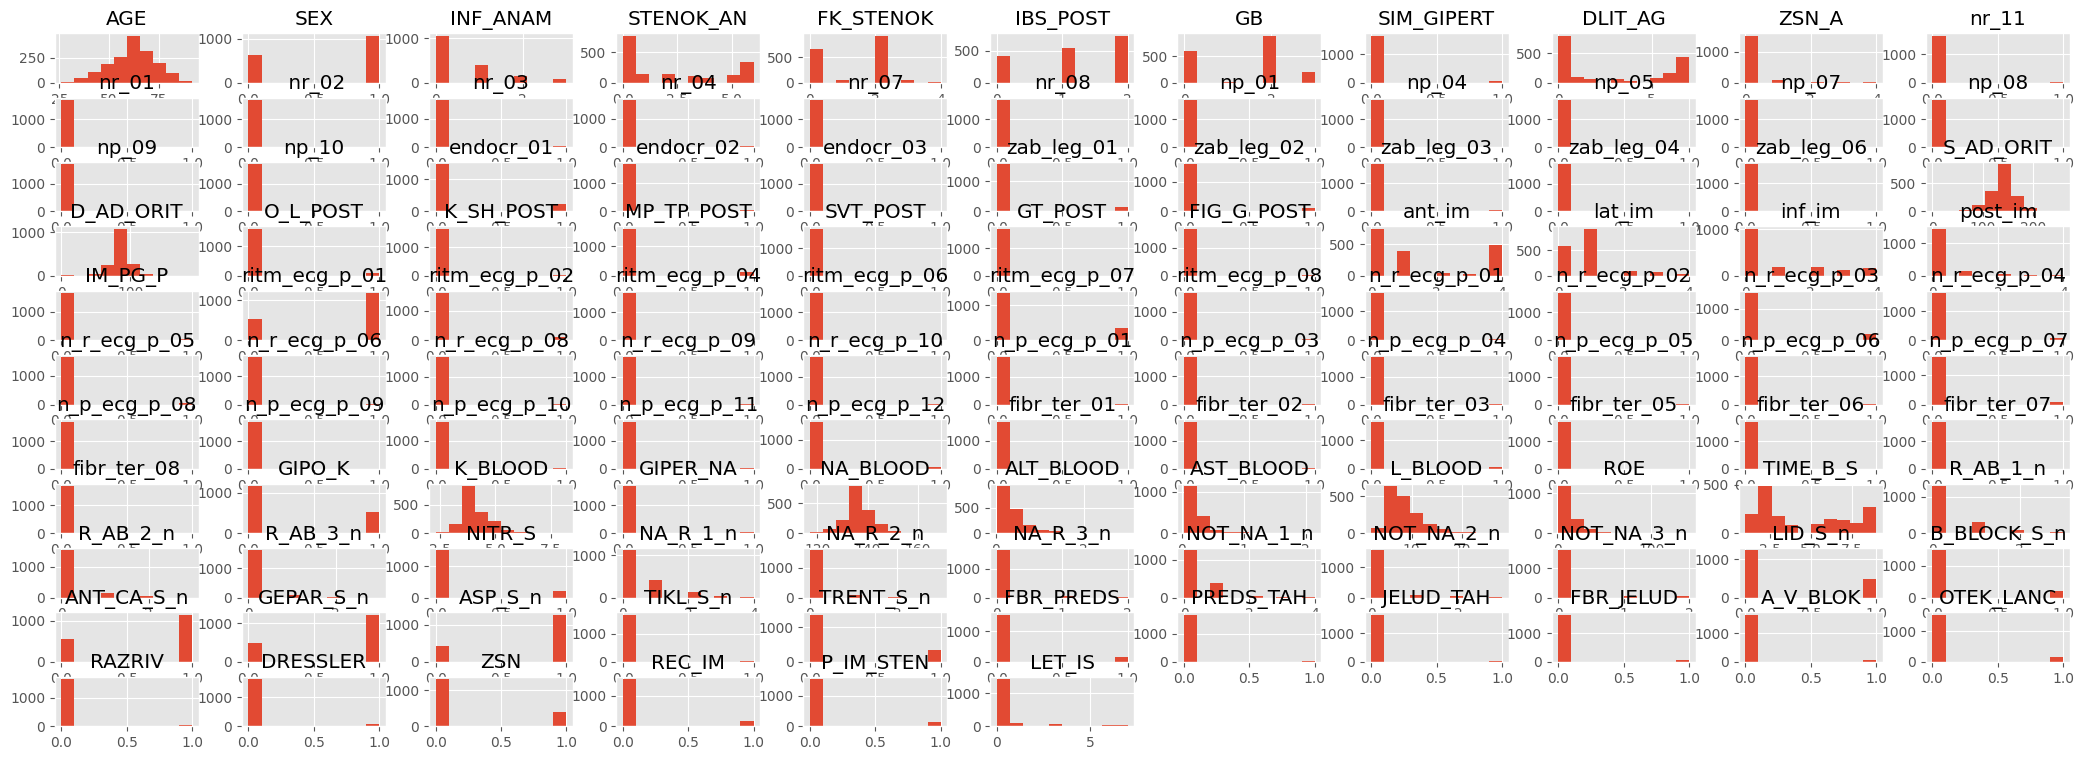

In [18]:
plt.rcParams['figure.figsize'] = (26, 9)
plt.style.use('ggplot')
dataframe.hist()
plt.show()

In [19]:
# se usará la prueba de Agostino
normal=[]
noNormal=[]
for oe in dataframe:
  datosColumna = dataframe[oe]
  stat,p=normaltest(datosColumna)
  if p > 0.5:
    normal.append(oe)
  else:
    noNormal.append(oe)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  []
Sin distribucion normal:  ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', ' nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIG_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02'

In [20]:
from scipy.stats import shapiro

for columna in dataframe.columns:
    # Verificar si la columna es numérica
    if dataframe[columna].dtype != 'object':
        # Aplicar la prueba de Shapiro-Wilk
        stat, p = shapiro(dataframe[columna])

        # Imprimir el resultado
        print('Columna:', columna)
        print('Estadístico de prueba: ', stat)
        print('Valor p: ', p)

        if p > 0.05:
            print('No se puede rechazar la hipótesis nula. La distribución parece normal.\n')
        else:
            print('Se rechaza la hipótesis nula. La distribución no parece normal.\n')
    else:
        print('Columna:', columna, 'no es numérica.\n')

Columna: AGE
Estadístico de prueba:  0.99351567029953
Valor p:  8.592547260377614e-07
Se rechaza la hipótesis nula. La distribución no parece normal.

Columna: SEX
Estadístico de prueba:  0.612918496131897
Valor p:  0.0
Se rechaza la hipótesis nula. La distribución no parece normal.

Columna: INF_ANAM
Estadístico de prueba:  0.6831415891647339
Valor p:  0.0
Se rechaza la hipótesis nula. La distribución no parece normal.

Columna: STENOK_AN
Estadístico de prueba:  0.7732081413269043
Valor p:  1.877739942195255e-43
Se rechaza la hipótesis nula. La distribución no parece normal.

Columna: FK_STENOK
Estadístico de prueba:  0.7204586267471313
Valor p:  0.0
Se rechaza la hipótesis nula. La distribución no parece normal.

Columna: IBS_POST
Estadístico de prueba:  0.7795652151107788
Valor p:  5.086713425499086e-43
Se rechaza la hipótesis nula. La distribución no parece normal.

Columna: GB
Estadístico de prueba:  0.7505860328674316
Valor p:  7.006492321624085e-45
Se rechaza la hipótesis nula. 

In [21]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(240,240))
plt.title('Myocardial infarction complications', y=1.05, size=15)
sb.heatmap(dataframe.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<Axes: title={'center': 'Myocardial infarction complications'}>

In [24]:
#24 horas después de la admisión al hospital
from re import L
caracteristicas=list(dataframe)
print(caracteristicas)
lista1 = caracteristicas[1:123]
print(lista1)
print(len(lista1))
lista1.remove('NOT_NA_3_n')
lista1.remove('LID_S_n')
lista1.remove('TIKL_S_n')
lista1.remove('FBR_PREDS')
lista1.remove('JELUD_TAH')
lista1.remove('FBR_JELUD')
print(lista1)
print(len(lista1))

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', ' nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIG_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_te

In [181]:
#48 horas después de la admisión al hospital
from re import L
caracteristicas=list(dataframe)
print(caracteristicas)
lista2 = caracteristicas[1:123]
lista2.remove('LID_S_n')
lista2.remove('FBR_PREDS')
lista2.remove('FBR_JELUD')
print(lista2)
print(len(lista2))

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', ' nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIG_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_te

In [200]:
X=dataframe.drop(['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', ' nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIG_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'B_BLOCK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'PREDS_TAH', 'JELUD_TAH', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'],axis=1)
y=dataframe['ZSN']
#y = dataframe['AGE']
caracteristicas=list(X)
print(X.shape)
print(y.shape)

(1700, 4)
(1700,)


In [252]:
XTrainArbol,XTestArbol,yTrainArbol,yTestArbol=train_test_split(X,y,test_size=0.2,random_state=5)

In [253]:
caracteristicas=list(dataframe)
print(caracteristicas)
XArbol=dataframe.drop([ 'NOT_NA_3_n', 'LID_S_n', 'TIKL_S_n', 'FBR_PREDS', 'JELUD_TAH', 'FBR_JELUD', 'LET_IS'],axis=1)
yArbol=dataframe[caracteristicas]
caracteristicas=list(XArbol)
print(caracteristicas)
print(XArbol)

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', ' nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIG_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_te

In [254]:
modeloArbol=DecisionTreeClassifier(max_depth=15) # DecisionTreeClassifier(max_depth=3) establece la profundidad del árbol en 3
modeloArbol.fit(XTrainArbol,yTrainArbol)
yPredictArbol=modeloArbol.predict(XTrainArbol)
print("Train Accuracy ",metrics.accuracy_score(yTrainArbol,yPredictArbol))

yPredictArbol=modeloArbol.predict(XTestArbol)
print("Test Accuracy ",metrics.accuracy_score(yTestArbol,yPredictArbol))

Train Accuracy  0.8007352941176471
Test Accuracy  0.75


[[248   4]
 [ 81   7]]


<Axes: >

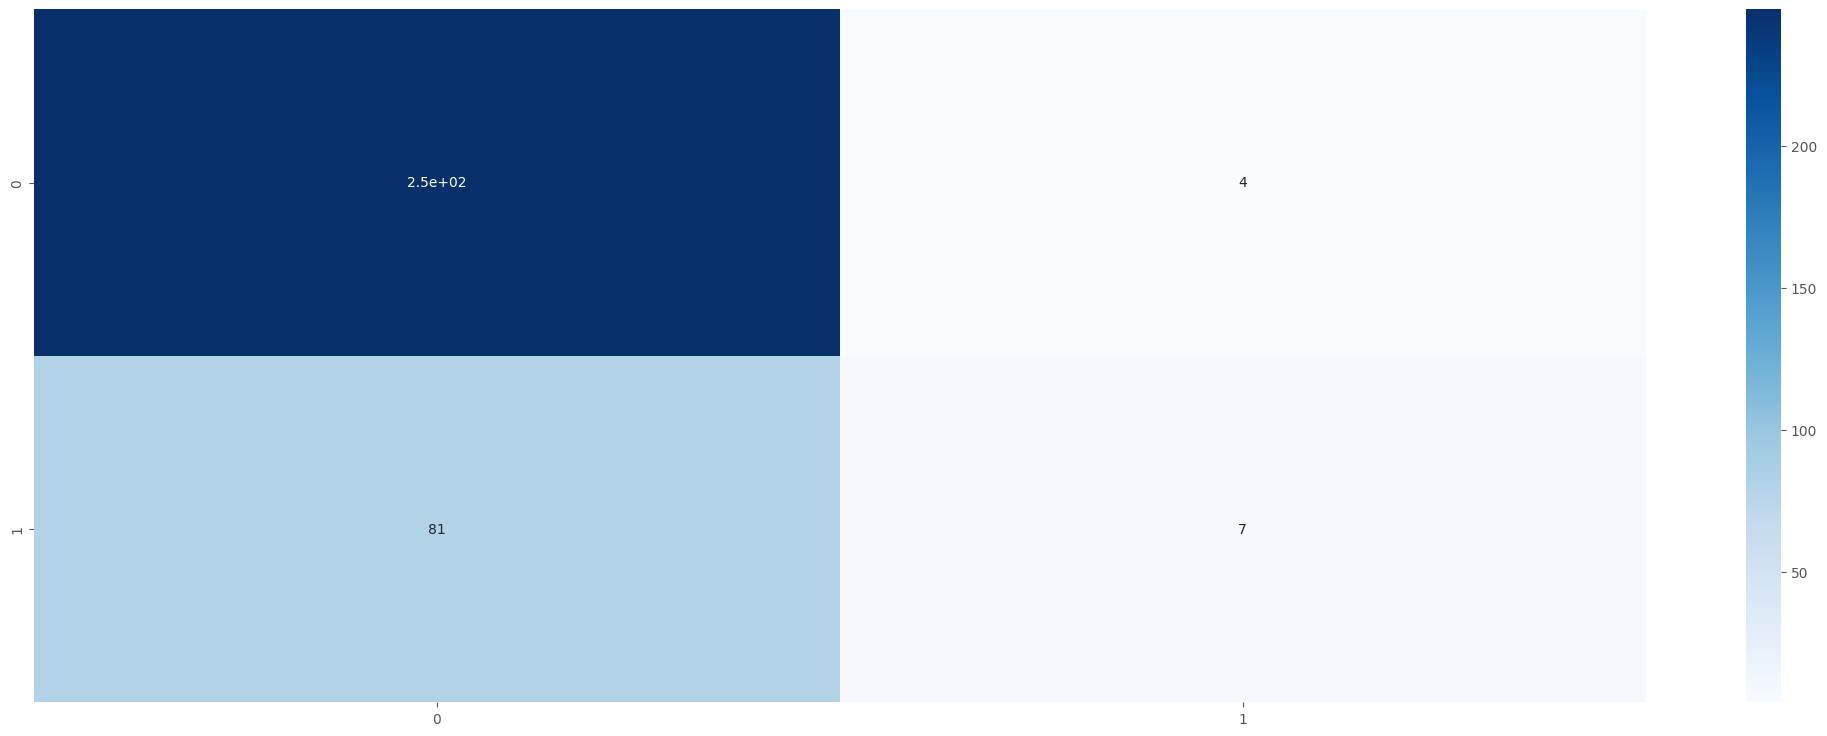

In [255]:
matrizArbol =confusion_matrix(yTestArbol,yPredictArbol)
print(matrizArbol)
sb.heatmap(matrizArbol,annot=True,cmap="Blues")

In [256]:
precision_recall_fscore_support(yTestArbol,yPredictArbol,average=None)
etiquetas=[]
for i in range(2):
  etiquetas.append(str(i))
print(classification_report(yTestArbol,yPredictArbol,target_names=etiquetas))
reportArbol = classification_report(yTestArbol,yPredictArbol,target_names=etiquetas)
accuracyArbol = modeloArbol.score(XTestArbol,yTestArbol)
print("Accuracy=",accuracyArbol)

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       252
           1       0.64      0.08      0.14        88

    accuracy                           0.75       340
   macro avg       0.70      0.53      0.50       340
weighted avg       0.72      0.75      0.67       340

Accuracy= 0.75


In [257]:
export_graphviz(modeloArbol,out_file="arbol.dot",class_names=etiquetas,feature_names=['1','2','3','4'],impurity=False,filled=True)

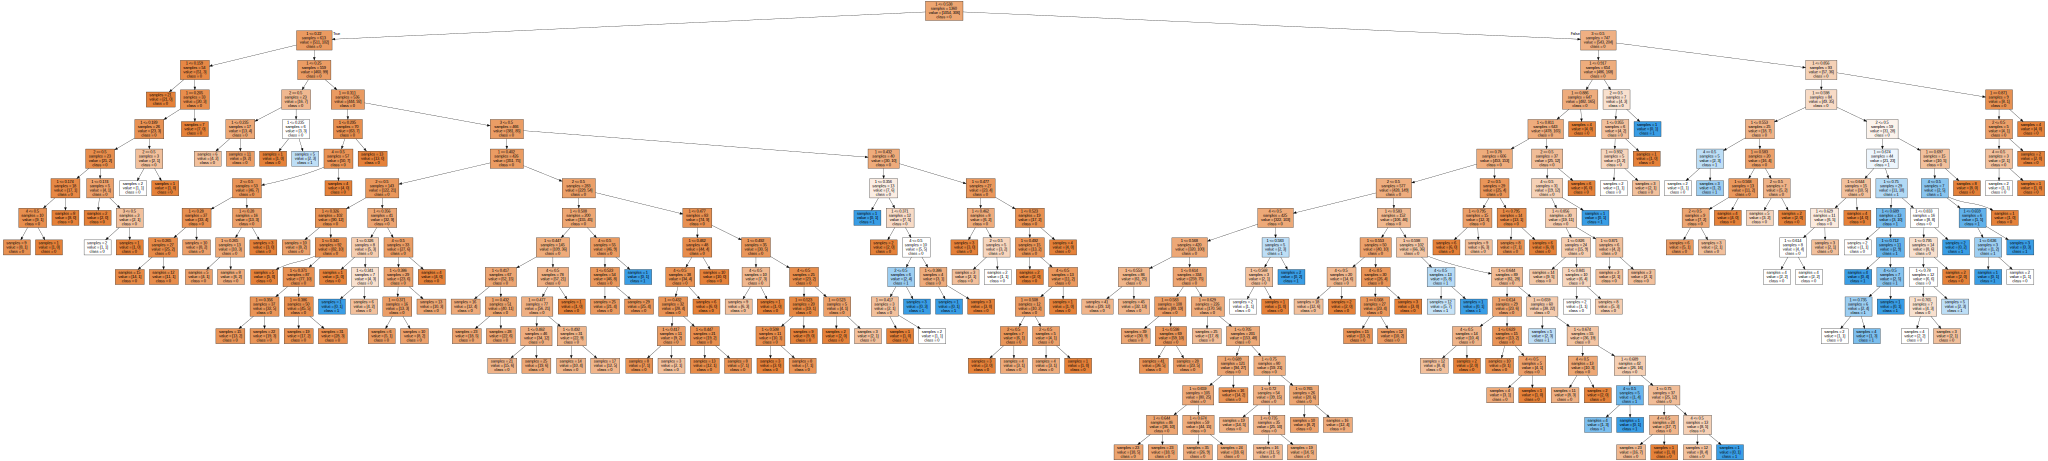

In [258]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

109


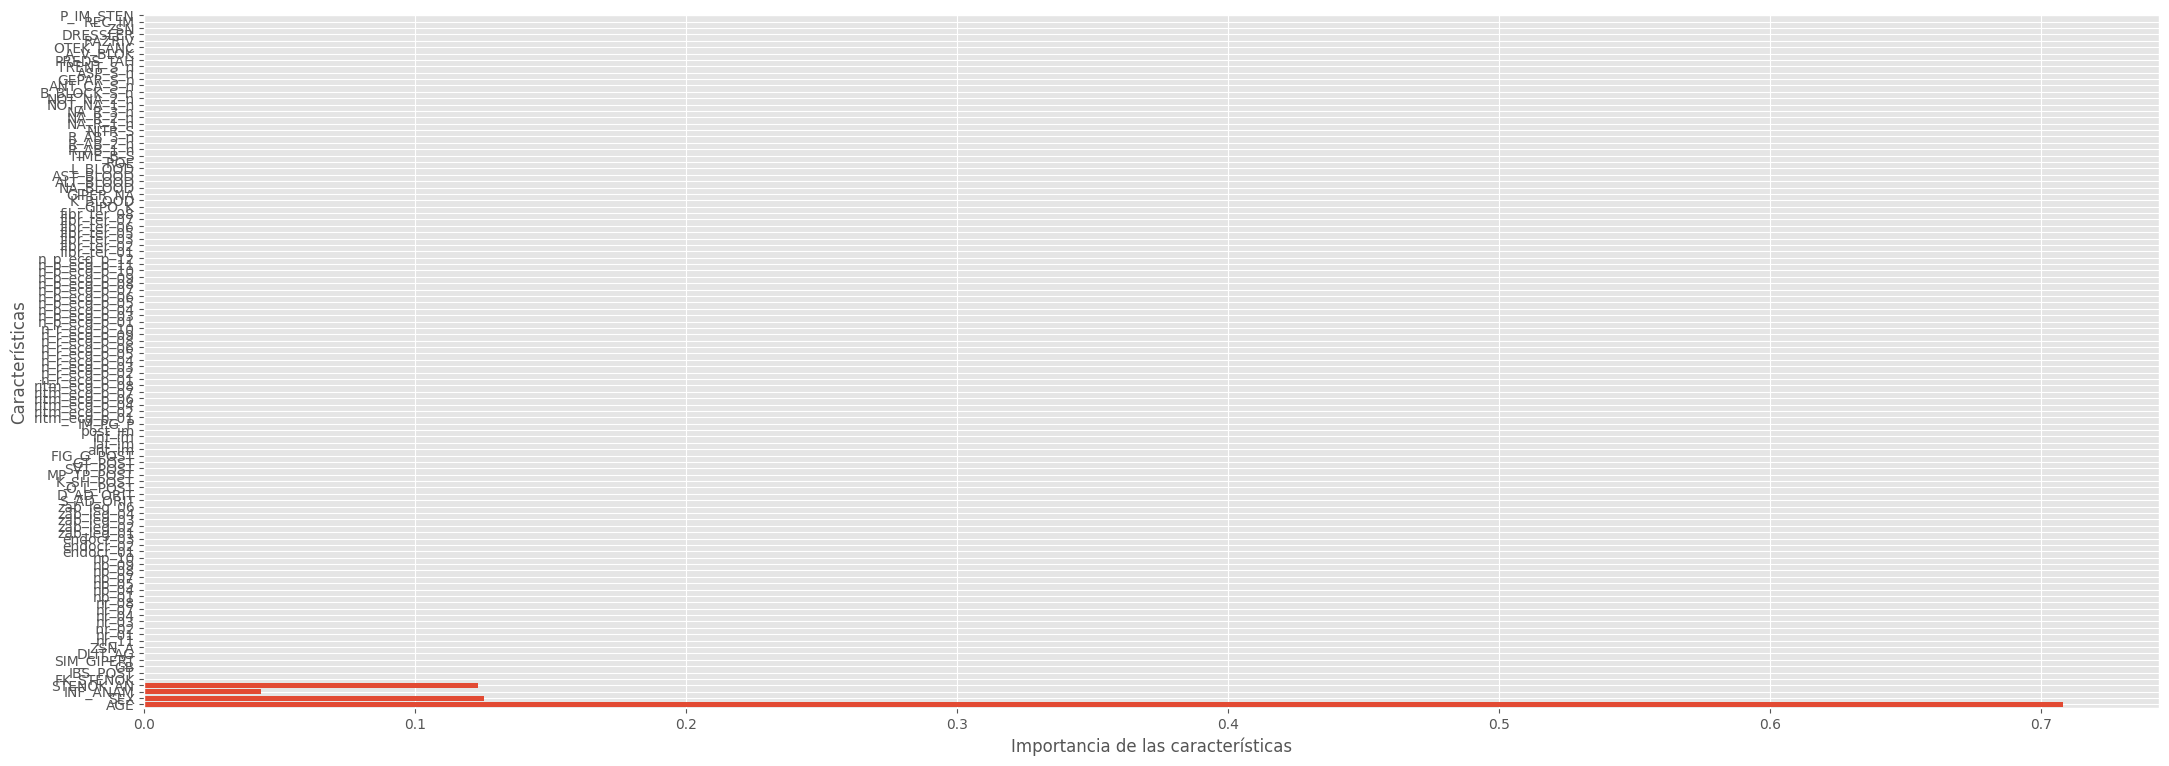

In [259]:
numeroCaracteristicas=XArbol.shape[1]
print(numeroCaracteristicas)
plt.barh(range(4),modeloArbol.feature_importances_)
plt.yticks(np.arange(numeroCaracteristicas),caracteristicas)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()